In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('final_1001_unscaled.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True)

In [4]:
df

,T2M_RANGE,T2M_MAX,PRECTOT,WS10M_MIN,WS50M,PS,WS50M_RANGE,WS50M_MAX,WS10M_RANGE,score
date,,,,,,,,,,
2000-01-04,15.92,18.09,15.95,2.08,6.73,100.29,5.58,9.31,3.59,1.000000
2000-01-05,13.48,10.82,0.00,0.52,2.94,101.15,4.19,4.85,1.98,1.142857
2000-01-06,15.85,12.89,0.01,0.04,2.95,101.31,5.17,5.22,2.35,1.285714
2000-01-07,13.88,14.51,0.01,1.59,5.02,101.37,4.03,6.47,1.69,1.428571
2000-01-08,13.04,15.78,1.02,1.50,4.17,100.77,3.72,5.73,1.40,1.571429
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,16.42,13.08,0.00,0.88,4.34,100.73,5.49,6.67,1.76,0.000000
2020-12-28,14.70,15.35,0.05,0.76,3.21,101.07,3.59,5.00,1.16,0.000000
2020-12-29,11.78,17.56,0.11,1.60,4.32,101.10,3.81,6.55,0.73,0.000000


In [5]:
test_result = adfuller(df['score'])

In [6]:
test_result

(-4.294196581426183,
 0.00045460462392821253,
 36,
 7631,
 {'1%': -3.4312072272409613,
  '5%': -2.8619188304979275,
  '10%': -2.566971646979922},
 -39411.68906355563)

In [7]:
def adfuller_test(score):
    result = adfuller(score)
    print(result)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['score'])

(-4.294196581426183, 0.00045460462392821253, 36, 7631, {'1%': -3.4312072272409613, '5%': -2.8619188304979275, '10%': -2.566971646979922}, -39411.68906355563)
ADF Test Statistic : -4.294196581426183
p-value : 0.00045460462392821253
#Lags Used : 36
Number of Observations : 7631
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


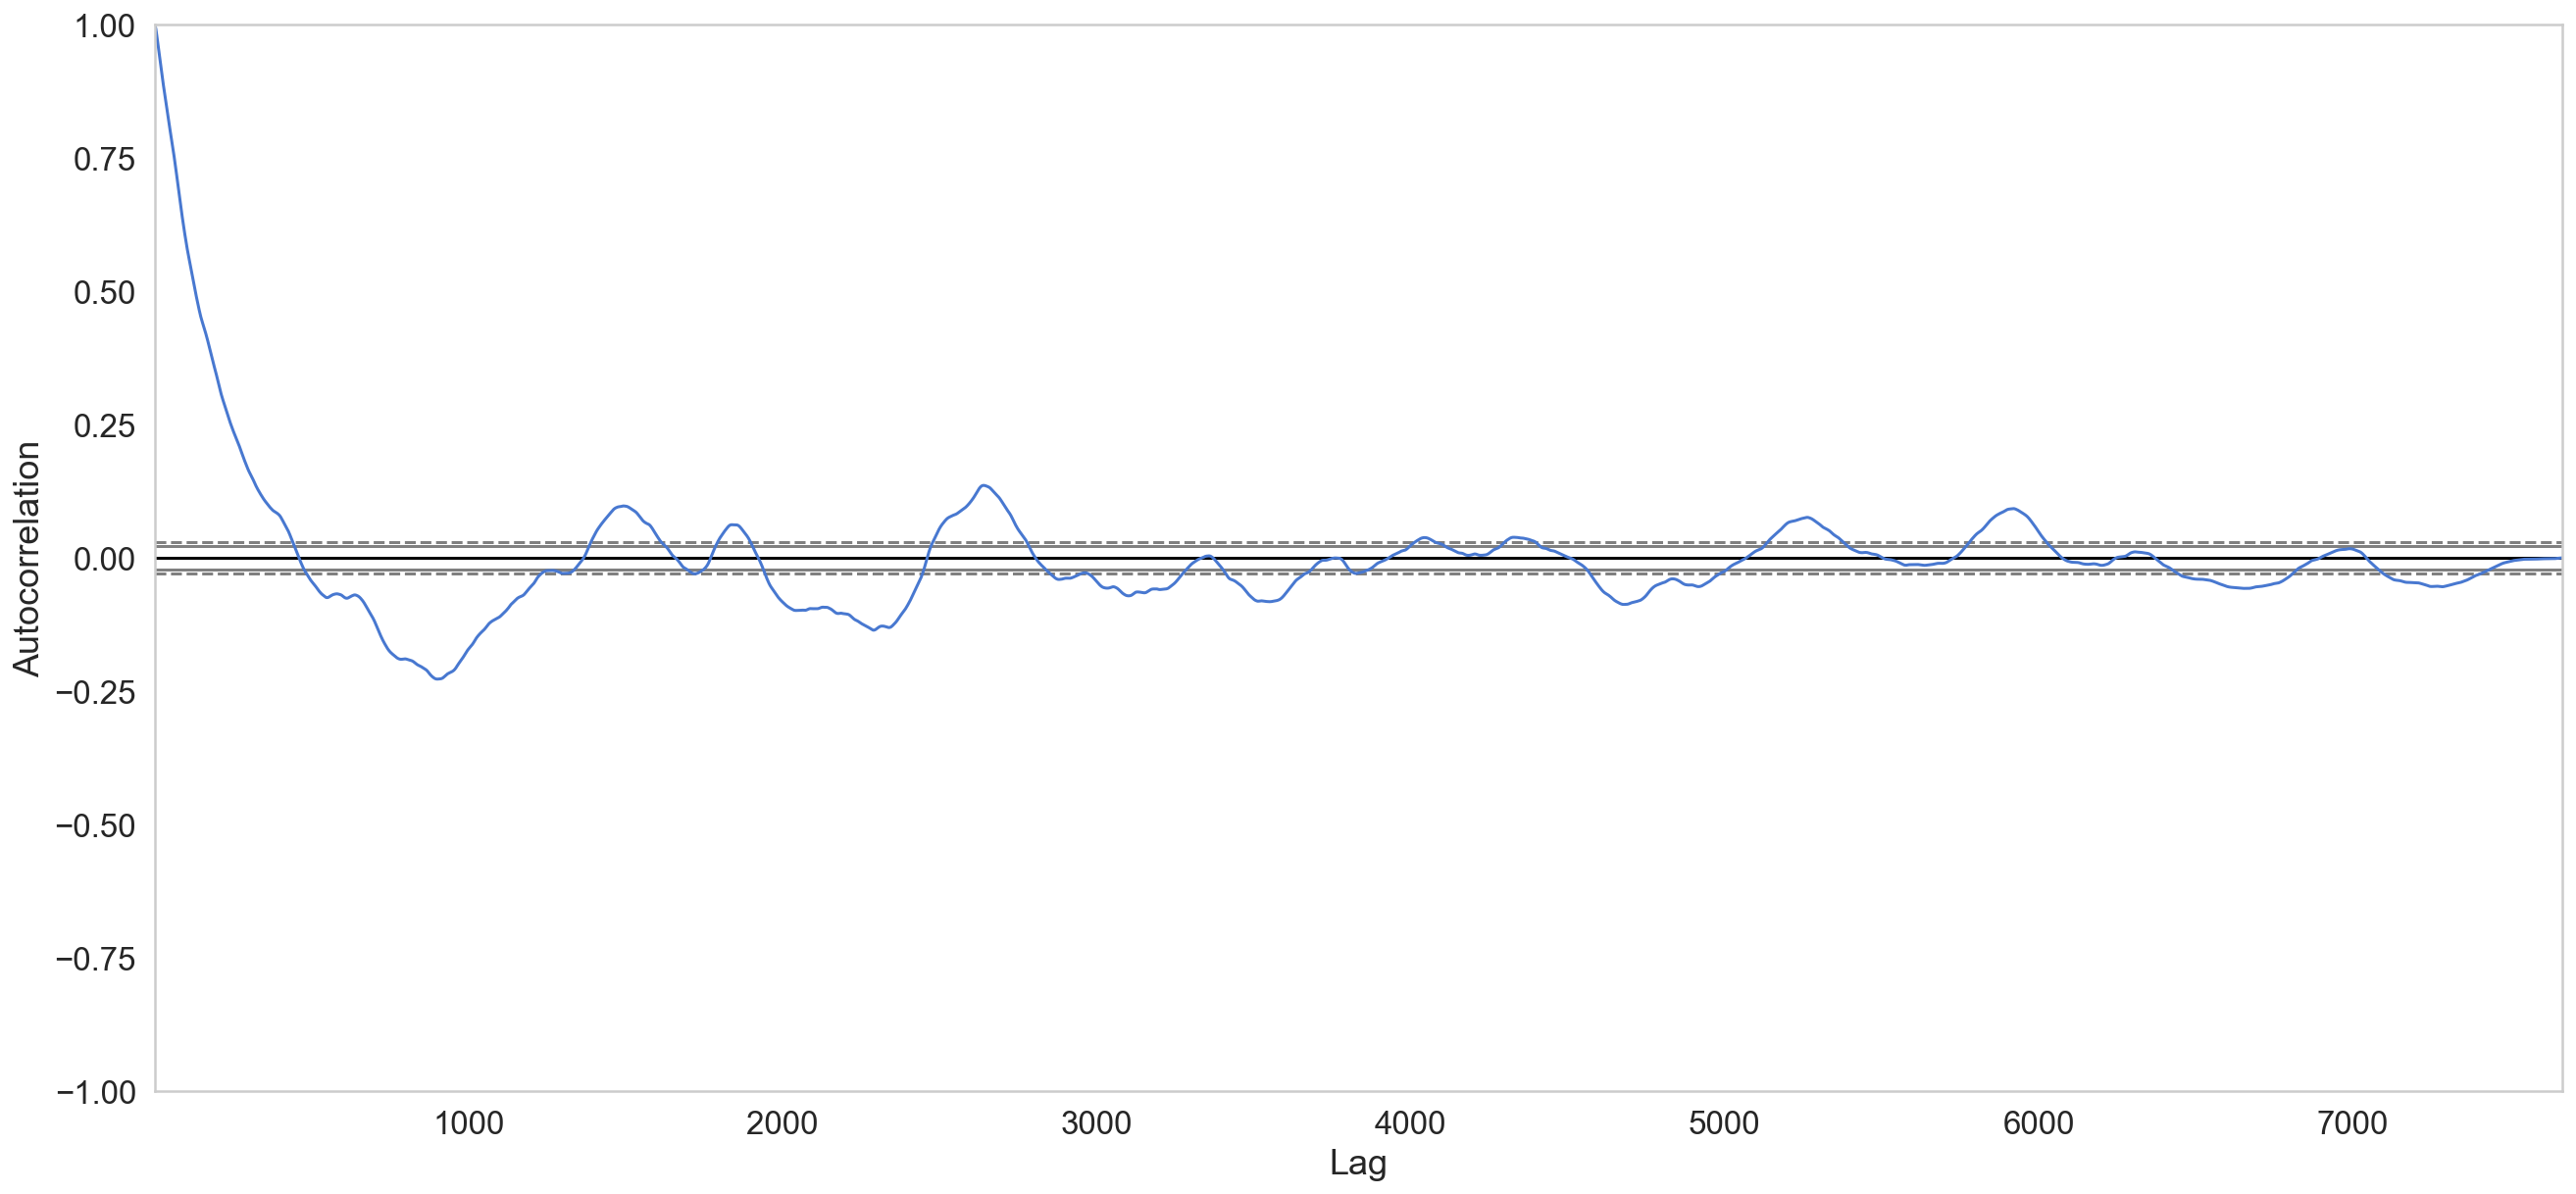

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['score'])
plt.show()

/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


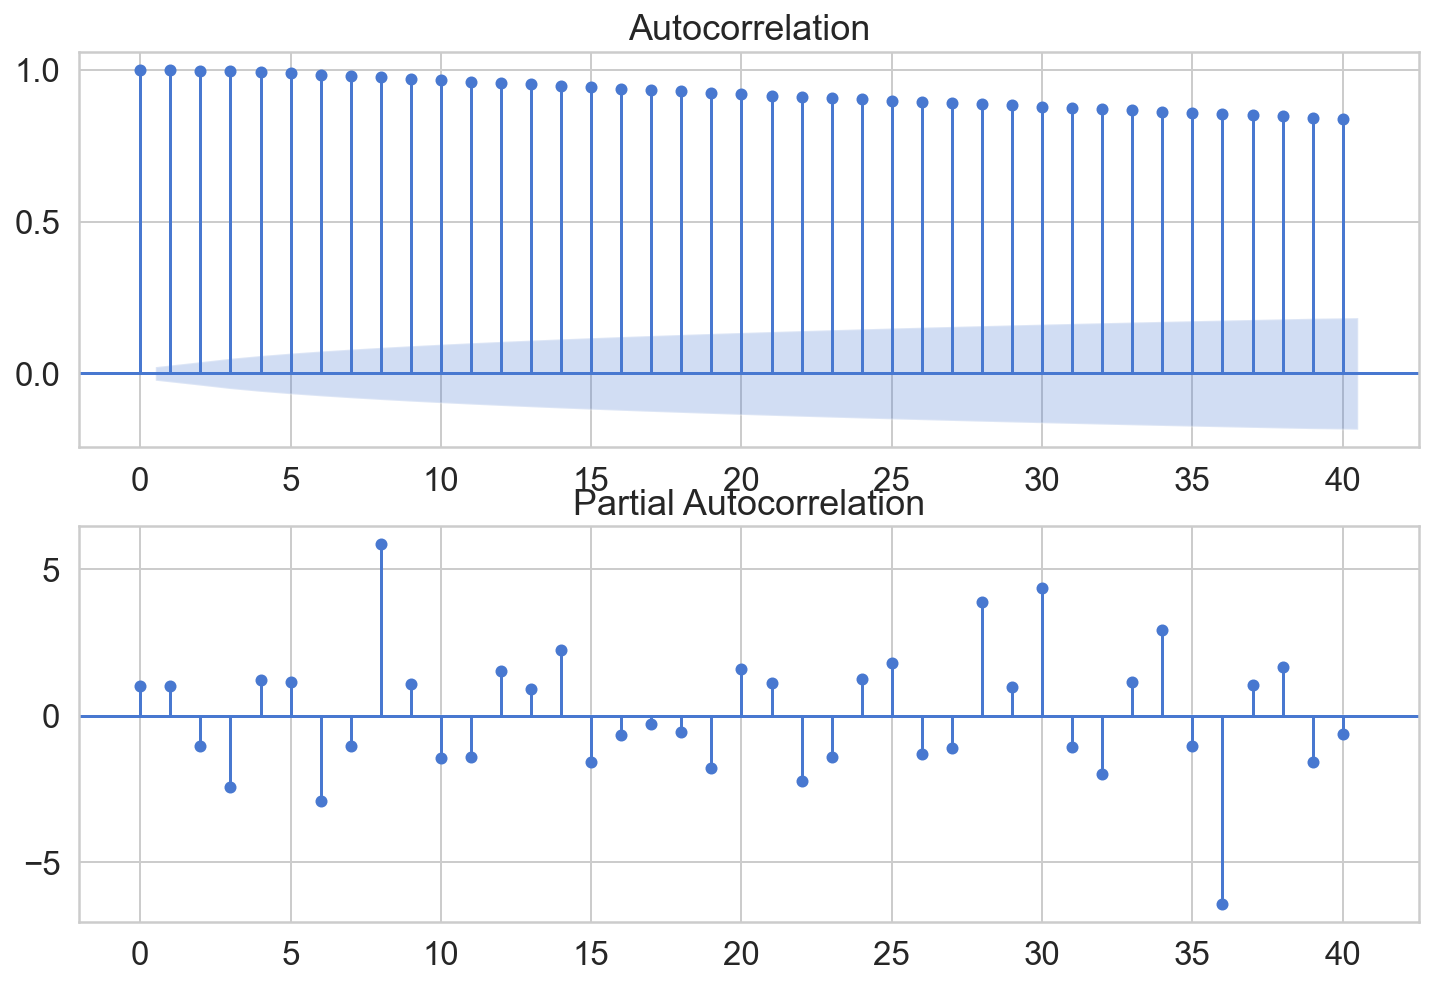

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['score'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['score'],lags=40,ax=ax2)

In [10]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['score'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency infor

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.score   No. Observations:                 7667
Model:                 ARIMA(1, 1, 1)   Log Likelihood               18186.213
Method:                       css-mle   S.D. of innovations              0.023
Date:                Tue, 06 Apr 2021   AIC                         -36364.426
Time:                        20:03:14   BIC                         -36336.648
Sample:                    01-05-2000   HQIC                        -36354.898
                         - 12-31-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.325e-05      0.002     -0.013      0.990      -0.004       0.004
ar.L1.D.score     0.8504      0.007    124.725      0.000       0.837       0.864
ma.L1.D.score     0.0705      0.012      5.760      0.000       0.046       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1759           +0.0000j            1.1759            0.0000
MA.1          -14.1934           +0.0000j           14.1934            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

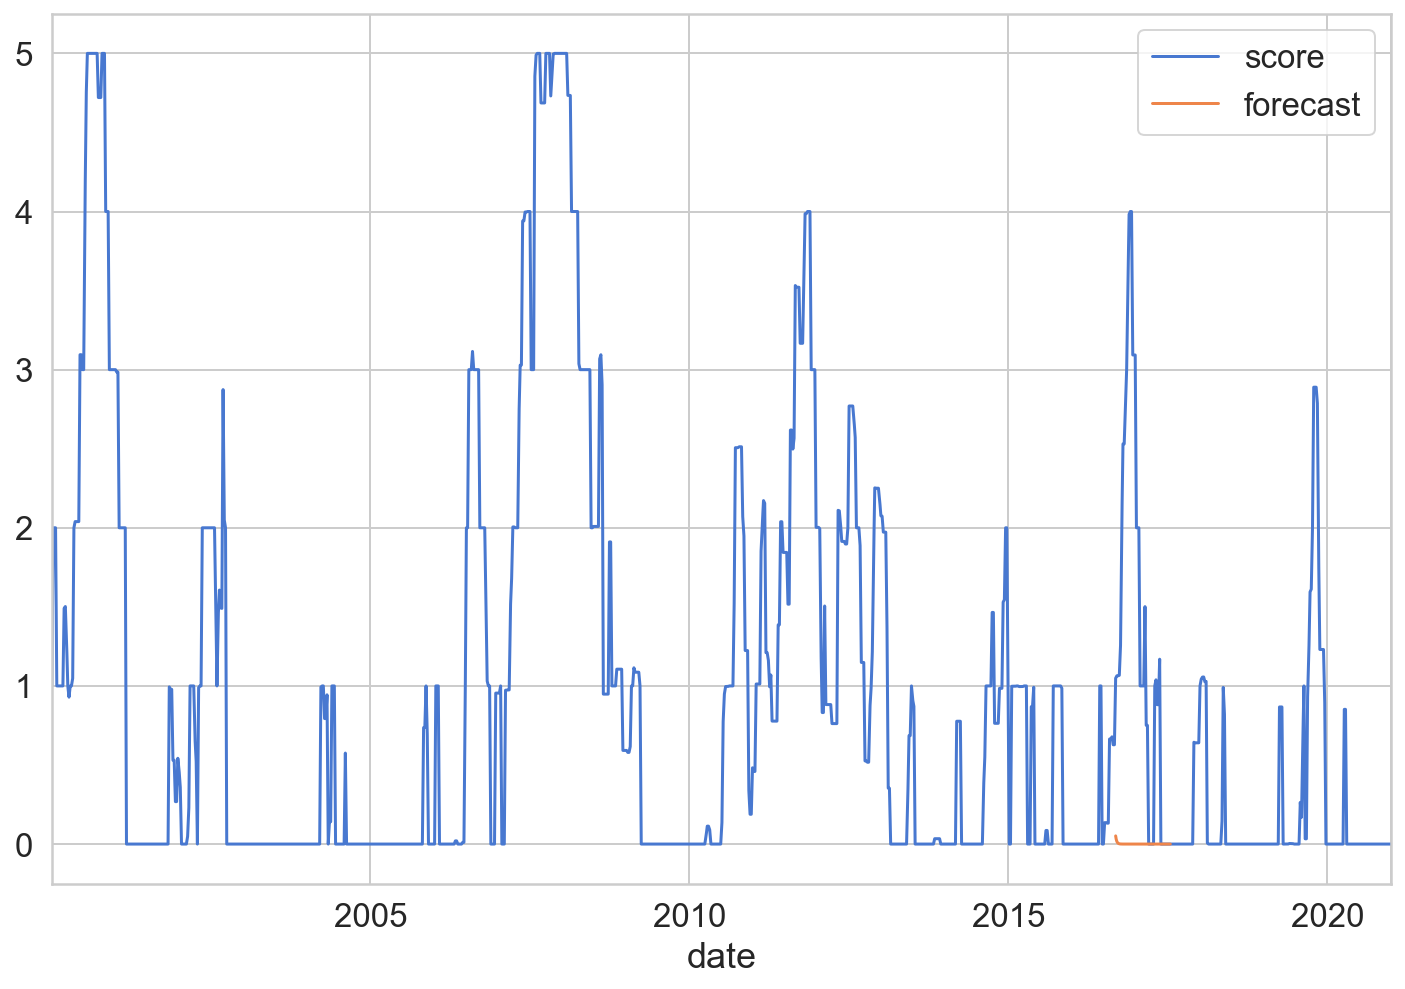

In [12]:
df['forecast'] = model_fit.predict(start=6090,end=6403,dynamic=True)
df[['score','forecast']].plot(figsize=(12,8))

/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='date'>

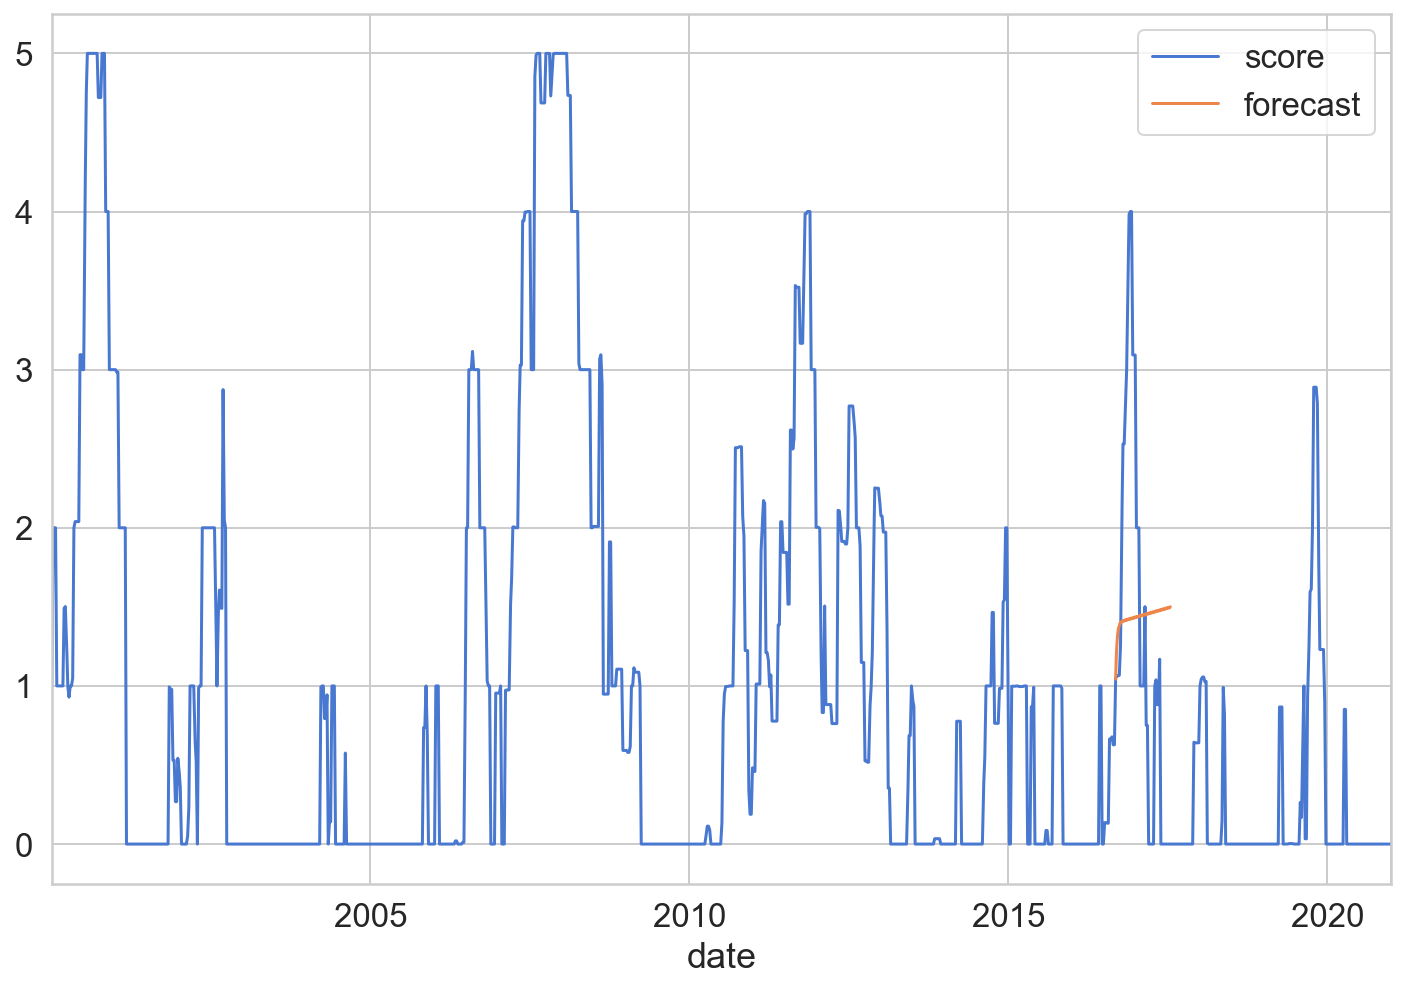

In [13]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['score'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=6090,end=6403,dynamic=True)
df[['score','forecast']].plot(figsize=(12,8))

<AxesSubplot:>

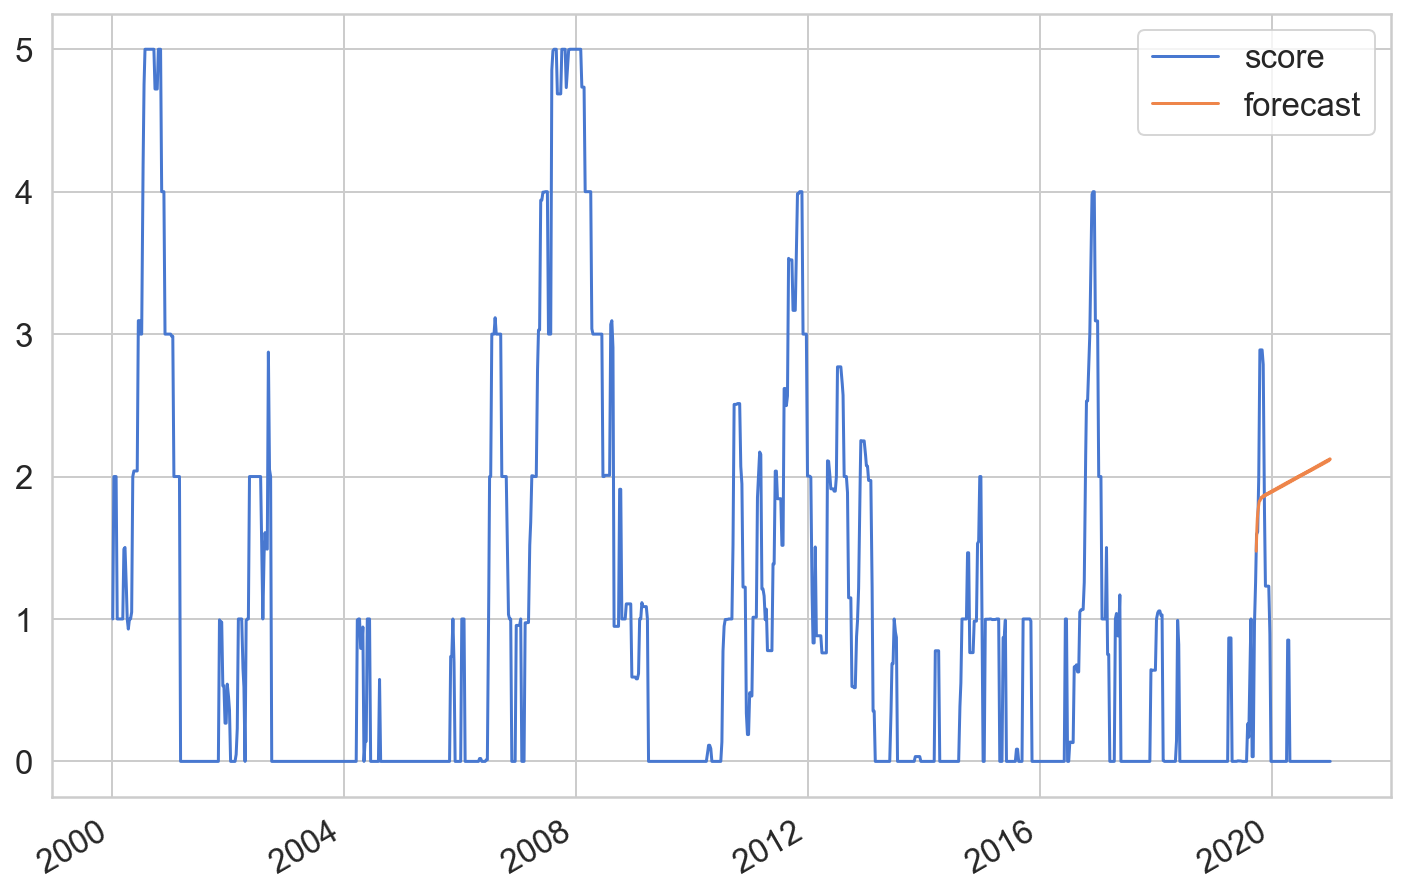

In [16]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 7201, end =7668 , dynamic= True)
future_df[['score', 'forecast']].plot(figsize=(12, 8))

In [17]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
ad_test(df['score'])

1. ADF :  -4.294196581426183
2. P-Value :  0.00045460462392821253
3. Num Of Lags :  36
4. Num Of Observations Used For ADF Regression: 7631
5. Critical Values :
	 1% :  -3.4312072272409613
	 5% :  -2.8619188304979275
	 10% :  -2.566971646979922


In [18]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['score'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-36375.818, Time=10.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-25641.700, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36333.147, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31255.418, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-25643.637, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-36394.269, Time=9.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-33707.820, Time=6.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-36364.250, Time=0.93 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-36412.185, Time=9.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-35494.796, Time=11.36 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-36251.880, Time=10.63 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-36661.720, Time=11.62 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-35615.356, Time=9.75 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-36734.294, Time=13.52 sec


In [19]:
print(df.shape)
train=df.iloc[:-767]
test=df.iloc[-767:]
print(train.shape,test.shape)

# Train test split
# train_size = int(len(df) * 0.9)
# test_size = len(df) - train_size
# train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
# print(len(train), len(test))

# print(train.shape,test.shape)

(7668, 11)
(6901, 11) (767, 11)


In [20]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['score'],order=(3,1,5))
model=model.fit()
model.summary()

/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/EllaPrice/.pyenv/versions/3.8.3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency infor

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.score   No. Observations:                 6900
Model:                 ARIMA(3, 1, 5)   Log Likelihood               17300.226
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 06 Apr 2021   AIC                         -34580.452
Time:                        20:14:28   BIC                         -34512.060
Sample:                    01-05-2000   HQIC                        -34556.868
                         - 11-25-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.002     -0.081      0.935      -0.003       0.003
ar.L1.D.score     0.8794      0.014     65.079      0.000       0.853       0.906
ar.L2.D.score    -0.5971      0.016    -36.346      0.000      -0.629      -0.565
ar.L3.D.score     0.2663      0.013     20.660      0.000       0.241       0.292
ma.L1.D.score    -0.1204      0.009    -14.087      0.000      -0.137      -0.104
ma.L2.D.score     0.8991      0.007    130.459      0.000       0.886       0.913
ma.L3.D.score     0.1835      0.012     14.942      0.000       0.159       0.208
ma.L4.D.score     0.4532      0.007     66.150      0.000       0.440       0.467
ma.L5.D.score     0.6816      0.008     80.225      0.000       0.665       0.698
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6295           -0.0000j            1.6295           -0.0000
AR.2            0.3061           -1.4868j            1.5180           -0.2177
AR.3            0.3061           +1.4868j            1.5180            0.2177
MA.1            0.6233           -0.7820j            1.0000           -0.1429
MA.2            0.6233           +0.7820j            1.0000            0.1429
MA.3           -0.2222           -0.9750j            1.0000           -0.2857
MA.4           -0.2222           +0.9750j            1.0000            0.2857
MA.5           -1.4670           -0.0000j            1.4670           -0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

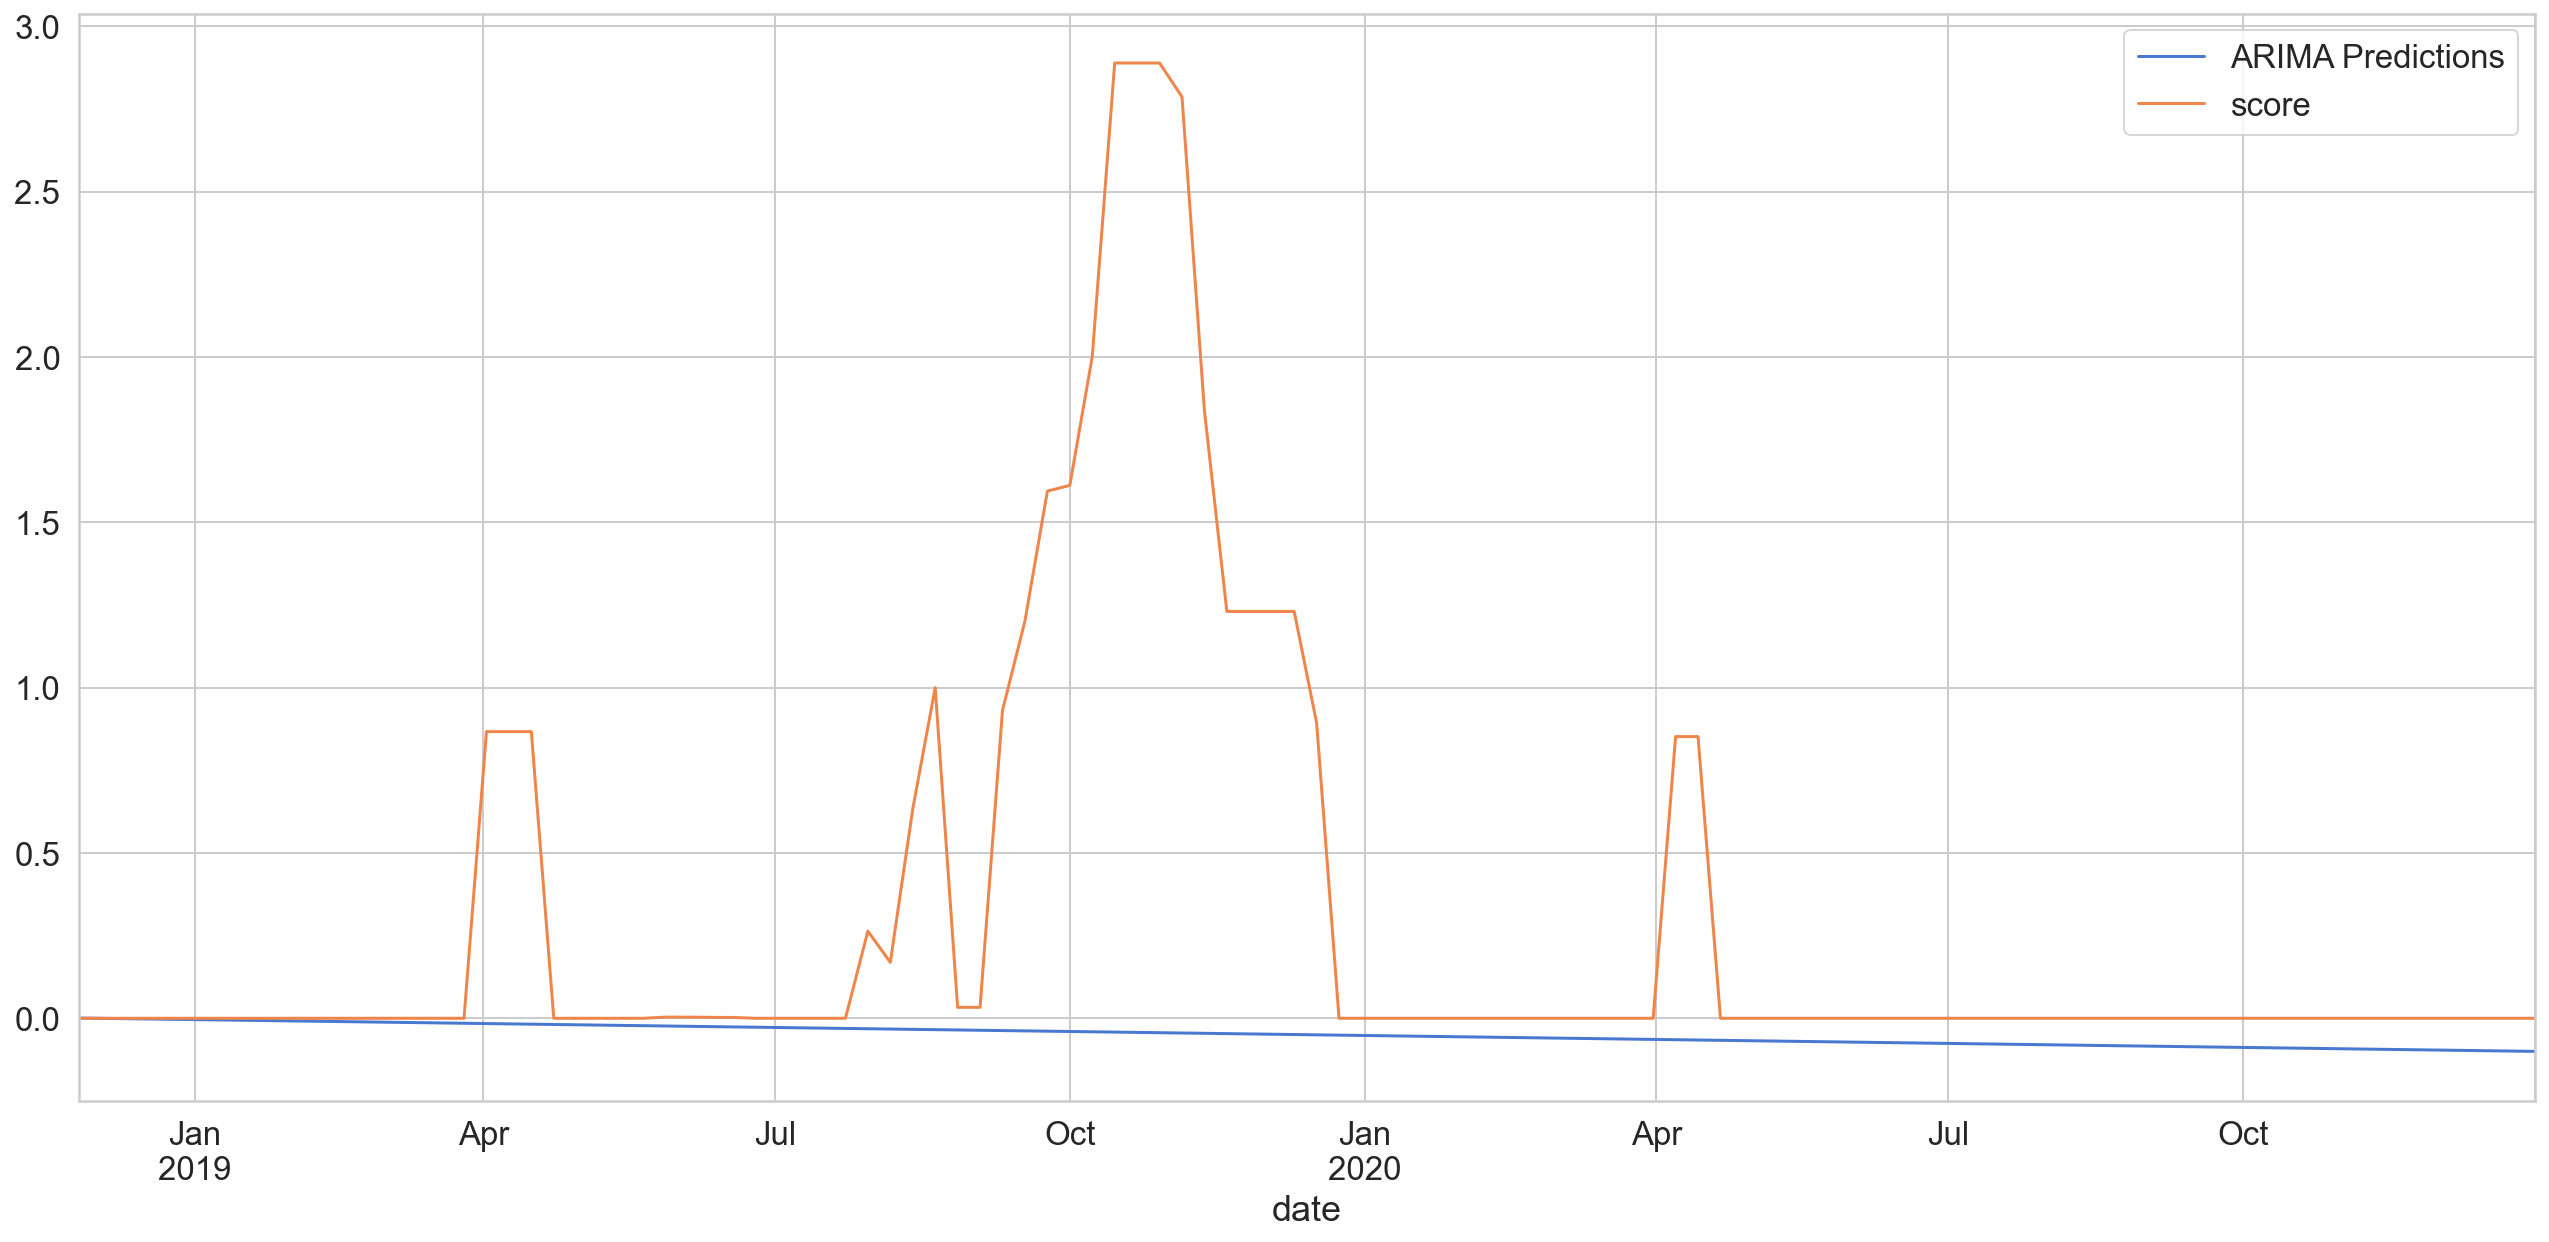

In [21]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['score'].plot(legend=True)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['score'].mean()
rmse=sqrt(mean_squared_error(pred,test['score']))
print(rmse)

0.748730742348073
